In [1]:
%cd experiments/category_targeting/

/Users/jordangunn/jatos/study_assets_root/online_experiments/experiments/category_targeting


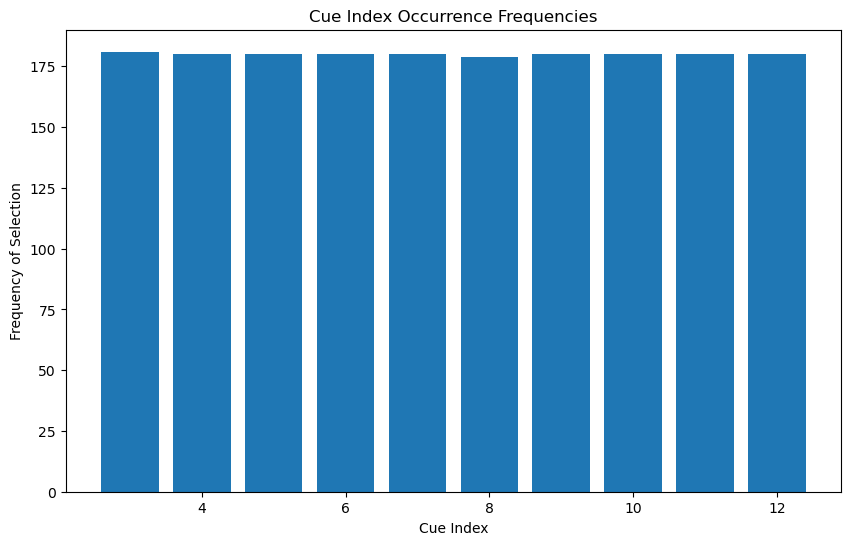

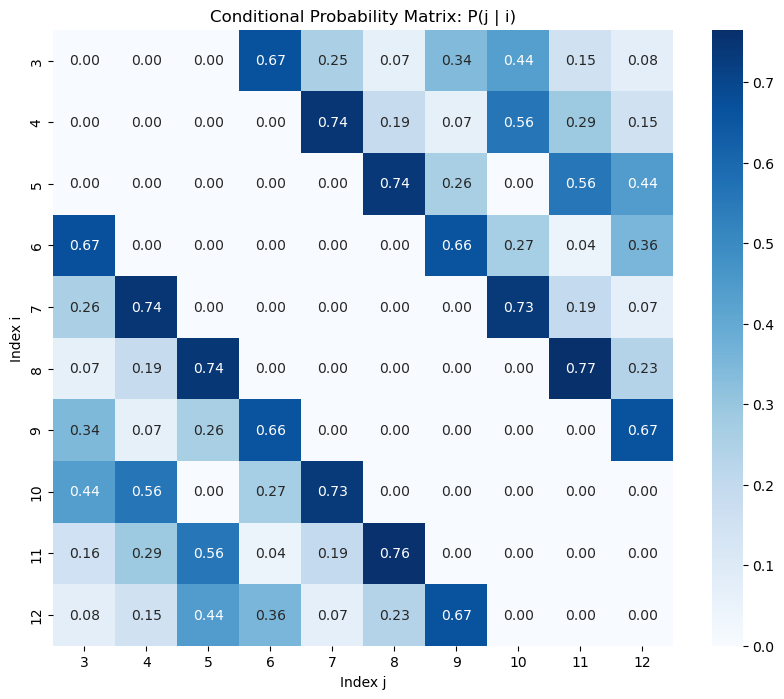

Final Index Counts: Counter({3: 181, 6: 180, 10: 180, 7: 180, 9: 180, 4: 180, 5: 180, 11: 180, 12: 180, 8: 179})
Final Index Ratios: {3: 0.3016666666666667, 4: 0.3, 5: 0.3, 6: 0.3, 7: 0.3, 8: 0.29833333333333334, 9: 0.3, 10: 0.3, 11: 0.3, 12: 0.3}


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from generate_design import generate_category_cue_indices

def analyze_cue_index_occurrences_and_conditional_probabilities(trials: list[list[int]], middle_indices: list[int]):
    """
    Analyze the rates of cue index occurrences and the conditional probability distributions of co-occurrences of indices from the generated trials.

    Args:
        trials: A list of generated trials (with cued and free recall events).
        middle_indices: The list of middle indices from which cues were drawn.

    Returns:
        A tuple containing:
        - final_index_counts: The counts of how often each index was selected.
        - final_index_ratios: The ratios of how often each index was selected.
        - conditional_prob_matrix: The conditional probability matrix P(j | i) for index co-occurrences.
    """
    # Flatten the list of trials and count how often each index appears
    cued_trials = [trial for trial in trials if any(index != -1 for index in trial)]  # Filter cued trials
    flattened_indices = [index for trial in cued_trials for index in trial if index != -1]  # Remove -1 (free recall)

    # Count how often each index appears in cued trials
    final_index_counts = Counter(flattened_indices)

    # Calculate the total number of cued trials
    total_cued_trials = len(cued_trials)

    # Calculate the final index ratios
    final_index_ratios = {idx: final_index_counts[idx] / total_cued_trials for idx in sorted(final_index_counts)}

    # Step 2: Calculate the conditional probability matrix P(j | i)
    conditional_prob_matrix = {i: {j: 0 for j in middle_indices} for i in middle_indices}
    index_appearance_count = {i: 0 for i in middle_indices}
    pair_count = {i: {j: 0 for j in middle_indices} for i in middle_indices}

    # Loop through the cued trials to gather data on co-occurrences
    for trial in cued_trials:
        cued_indices = [index for index in trial if index != -1]
        for i in cued_indices:
            index_appearance_count[i] += 1  # Count how often each index appears
            for j in cued_indices:
                if i != j:
                    pair_count[i][j] += 1  # Count how often two indices appear together

    # Calculate conditional probabilities P(j | i)
    for i in middle_indices:
        for j in middle_indices:
            if index_appearance_count[i] > 0:  # Avoid division by zero
                conditional_prob_matrix[i][j] = pair_count[i][j] / index_appearance_count[i]

    # Step 3: Visualization
    # Plot the index occurrence frequencies
    plt.figure(figsize=(10, 6))
    plt.bar(sorted(final_index_counts.keys()), [final_index_counts[idx] for idx in sorted(final_index_counts.keys())])
    plt.xlabel('Cue Index')
    plt.ylabel('Frequency of Selection')
    plt.title('Cue Index Occurrence Frequencies')
    plt.show()

    # Prepare data for heatmap for conditional probabilities
    matrix_data = np.array([[conditional_prob_matrix[i][j] for j in middle_indices] for i in middle_indices])

    # Plot the heatmap for conditional probabilities
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_data, annot=True, fmt=".2f", cmap="Blues", xticklabels=middle_indices, yticklabels=middle_indices)
    plt.title('Conditional Probability Matrix: P(j | i)')
    plt.xlabel('Index j')
    plt.ylabel('Index i')
    plt.show()

    return final_index_counts, final_index_ratios, conditional_prob_matrix


# Example usage
list_length = 16
middle_region_size = 10
cue_count = 3
spacing = 2
total_trials = 1000
control_proportion = 0.4
total_recalls = 6
cue_region_size = 10

# Generate the trials
generated_trials = generate_category_cue_indices(
    trial_count=total_trials,
    list_length=list_length,
    control_proportion=control_proportion,
    cue_count=cue_count,
    total_recalls=total_recalls,
    cue_region_size=cue_region_size,
    spacing=spacing
)

# Analyze the generated trials
serial_positions = list(range((list_length - cue_region_size) // 2, (list_length + cue_region_size) // 2))
final_index_counts, final_index_ratios, conditional_prob_matrix = analyze_cue_index_occurrences_and_conditional_probabilities(
    generated_trials, serial_positions
)

# Display the results
print("Final Index Counts:", final_index_counts)
print("Final Index Ratios:", final_index_ratios)

In [3]:
generated_trials

[[6, -1, 10, -1, 3, -1],
 [7, -1, 3, -1, 10, -1],
 [-1, -1, -1, -1, -1, -1],
 [6, -1, 10, -1, 3, -1],
 [9, -1, 3, -1, 6, -1],
 [-1, -1, -1, -1, -1, -1],
 [10, -1, 7, -1, 4, -1],
 [5, -1, 8, -1, 11, -1],
 [-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1],
 [5, -1, 9, -1, 12, -1],
 [6, -1, 9, -1, 12, -1],
 [9, -1, 5, -1, 12, -1],
 [-1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1],
 [11, -1, 3, -1, 8, -1],
 [5, -1, 12, -1, 9, -1],
 [6, -1, 9, -1, 3, -1],
 [-1, -1, -1, -1, -1, -1],
 [3, -1, 6, -1, 9, -1],
 [-1, -1, -1, -1, -1, -1],
 [4, -1, 7, -1, 10, -1],
 [3, -1, 9, -1, 6, -1],
 [-1, -1, -1, -1, -1, -1],
 [9, -1, 5, -1, 12, -1],
 [-1, -1, -1, -1, -1, -1],
 [8, -1, 11, -1, 5, -1],
 [4, -1, 7, -1, 10, -1],
 [-1, -1, -1, -1, -1, -1],
 [5, -1, 12, -1, 9, -1],
 [-1, -1, -1, -1, -1, -1],
 [10, -1, 3, -1, 6, -1],
 [8, -1, 12, -1, 5, -1],
 [6, -1, 12, -1, 3, -1],
 [4, -1, 7, -1, 11, -1],
 [-1, -1, -1, -1, -1, -1],
 [3, -1, 9, -1, 6, -1],
